In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to displayed directly in the notebook we use :
%matplotlib inline

# import package for data processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance


In [170]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
train.shape

(891, 12)

In [172]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [173]:
test.shape

(418, 11)

In [174]:
data= pd.concat([train, test], ignore_index=True) # append not working here
data.shape

(1309, 12)

In [175]:
Passenger_id = test['PassengerId']

In [176]:
train.set_index(['PassengerId'], inplace=True)
test.set_index(['PassengerId'], inplace=True)

In [177]:
print(train.isnull().sum())
print('*'*10)
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
**********
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [178]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<Axes: >

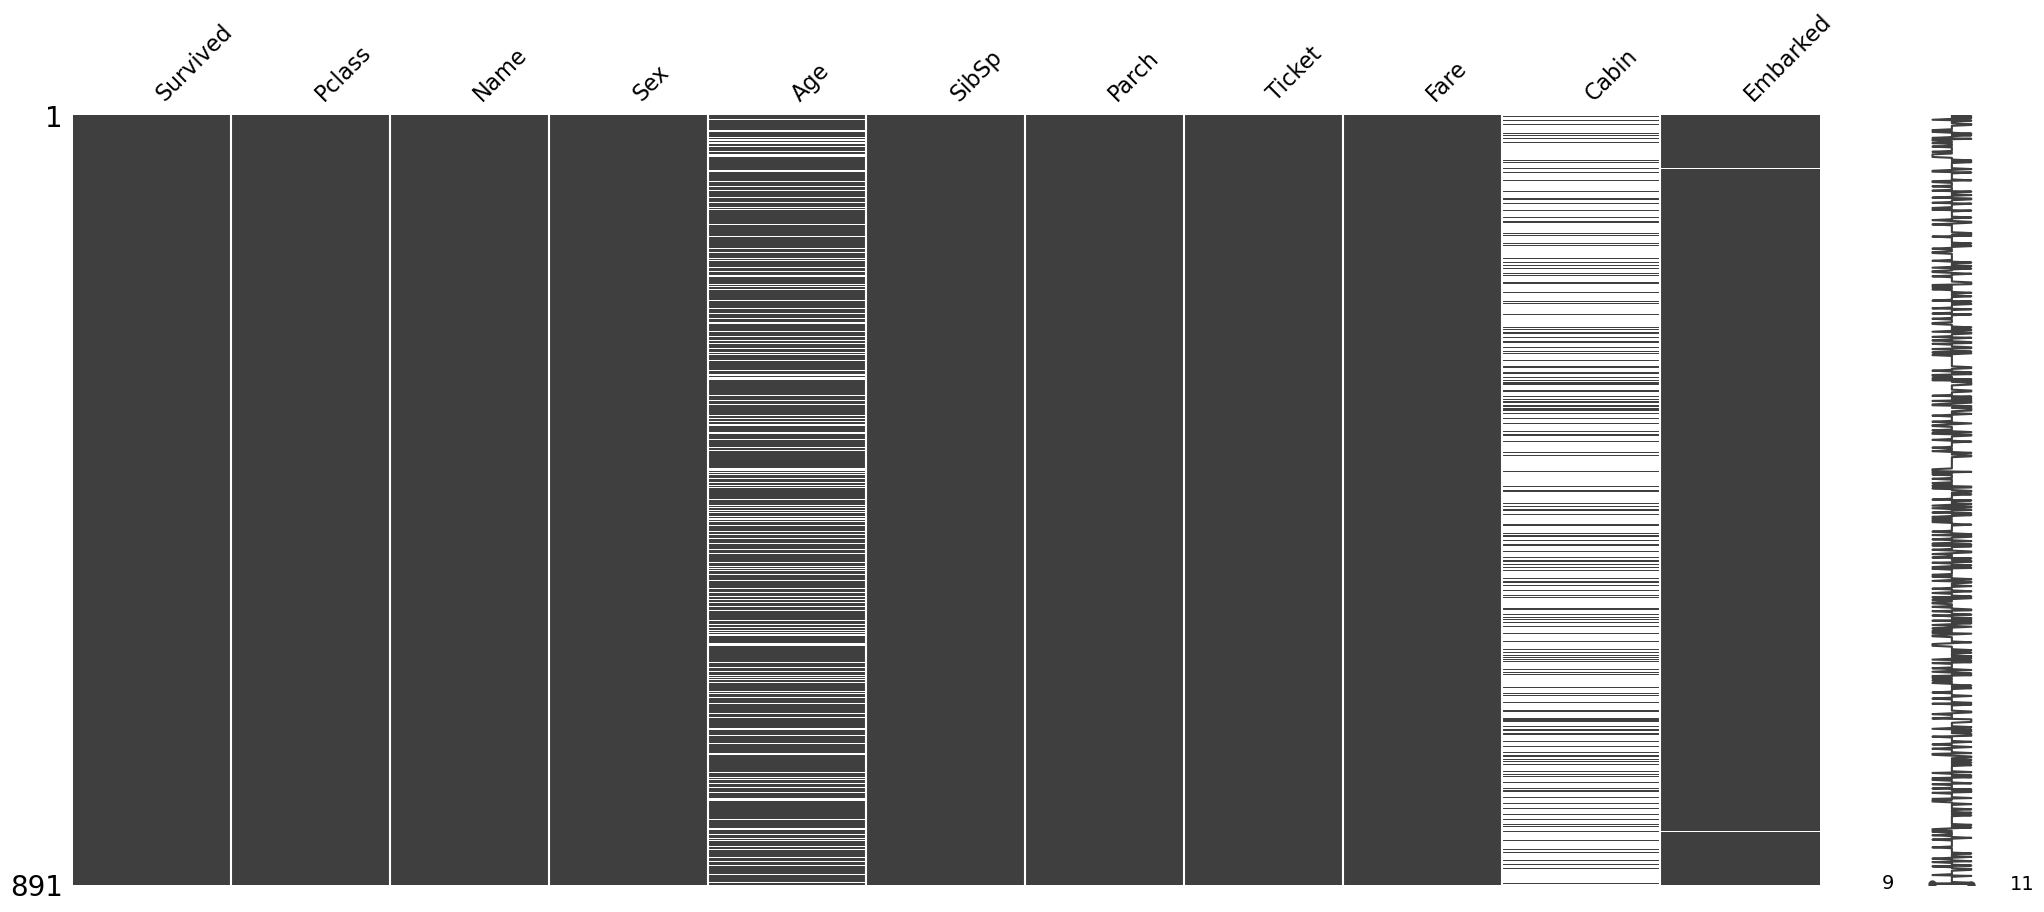

In [179]:
import missingno as mn
mn.matrix(train)

In [180]:
train.shape

(891, 11)

In [181]:
#from sklearn.preprocessing import Simpleimputer # not exixt anymore

from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median') 

# Reshape the input data to be a 2D array (n_samples, n_features) if necessary
age_reshaped = train['Age'].values.reshape(-1, 1)

# Fit the imputer to the data and transform the data
age_imputed = imp.fit_transform(age_reshaped)

# Assign the imputed data back to the DataFrame
train['Age2'] = age_imputed

# Optionally, you can convert Age2 to int if needed
train['Age2'] = train['Age2'].astype(int)

train.head()

#repeat reshape and imput for Age_test
Age_test_reshaped = test['Age'].values.reshape(-1, 1)
Age_test_imputed = imp.fit_transform(Age_test_reshaped)
test['Age_test'] = Age_test_imputed
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [182]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2          0
dtype: int64

In [183]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [184]:
train['Embarked'].fillna('S', inplace= True)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Age2          0
dtype: int64

In [185]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age_test      0
dtype: int64

In [186]:
print(f'test_fare mean is : {test["Fare"].mean():0.2f}')
print(f'test_fare median is : {test["Fare"].median():0.2f}')
print(f'test_fare mode is : {test["Fare"].mode()}:0.2f')

test_fare mean is : 35.63
test_fare median is : 14.45
test_fare mode is : 0    7.75
Name: Fare, dtype: float64:0.2f


In [187]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Age_test      0
dtype: int64

In [188]:
train.drop(['Age', 'Cabin'], axis=1, inplace=True)
test.drop(['Age', 'Cabin'], axis=1,inplace=True)

In [189]:
train['Sex'] = train['Sex'].apply(lambda x:0 if x== 'female' else 1 )
train['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='Fare'>

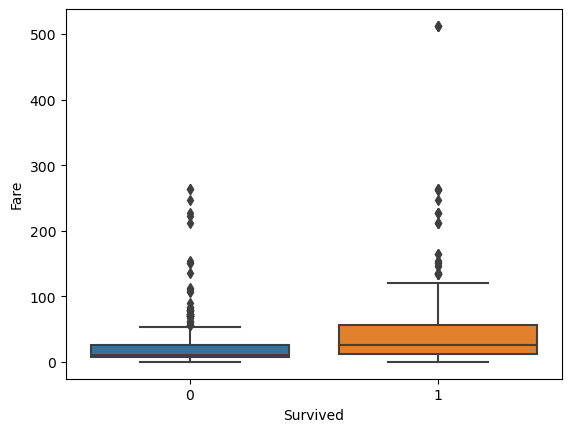

In [190]:
sns.boxplot(x='Survived', y= 'Fare' , data = train)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Survived', ylabel='Fare'>

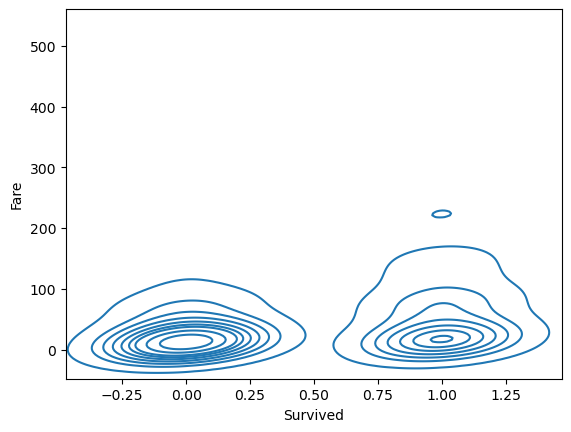

In [191]:
sns.kdeplot(x='Survived', y= 'Fare' , data = train) # other plottin way for ouliers

In [192]:
#train['Fare'] = train[train['Fare']< 400]
train.loc[train['Fare'] < 400, 'Fare'] = train.loc[train['Fare'] < 400, 'Fare']
train['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [193]:
train.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,29.345679
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,13.028212
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,22.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,28.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,80.000000


In [194]:
#transform columns to numircs
numeric_columns = train.select_dtypes(include=np.number).columns
train = train[numeric_columns]
train.groupby('Survived').mean()

,Pclass,Sex,SibSp,Parch,Fare,Age2
Survived,,,,,,
0,2.531876,0.852459,0.553734,0.329690,22.117887,30.012750
1,1.950292,0.318713,0.473684,0.464912,48.395408,28.274854


In [195]:
train.groupby('Sex').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2
Sex,,,,,,
0,0.742038,2.159236,0.694268,0.649682,44.479818,27.920382
1,0.188908,2.389948,0.429809,0.235702,25.523893,30.121317


In [196]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.064909
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,-0.339999
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.080750
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.233066
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.172745
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,0.096838
Age2,-0.064909,-0.339999,0.080750,-0.233066,-0.172745,0.096838,1.000000


<Axes: >

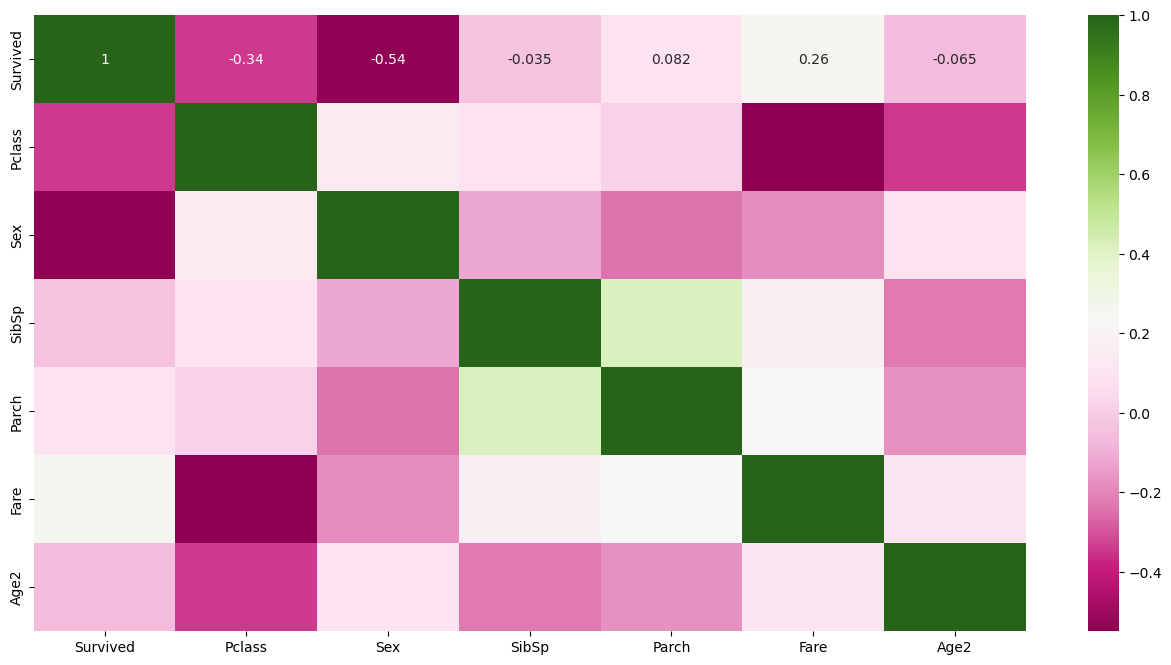

In [197]:
plt.subplots(figsize=(16,8))
sns.heatmap(data=train.corr(), annot=True, cmap='PiYG')

<Axes: xlabel='Sex', ylabel='Survived'>

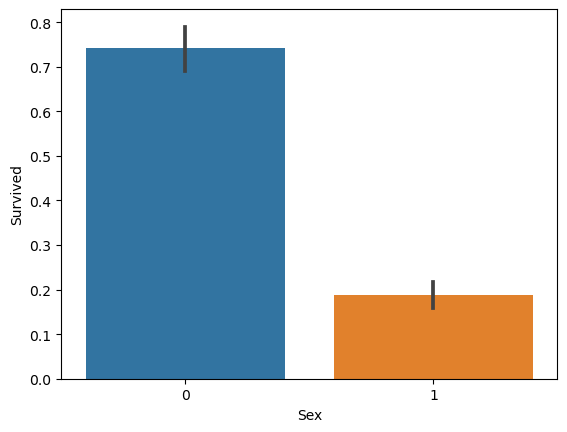

In [198]:
sns.barplot(data=train, x='Sex', y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

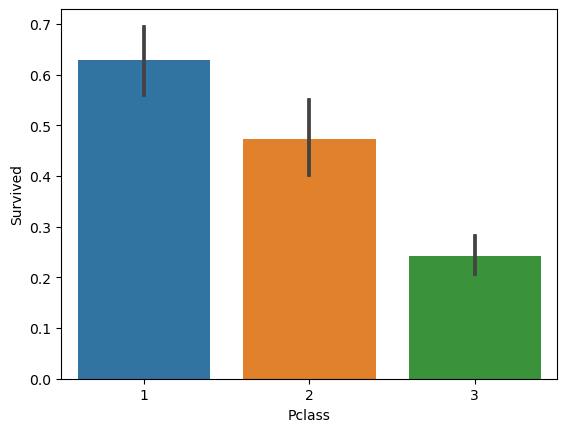

In [199]:
sns.barplot(data=train, x='Pclass', y='Survived')

C:\Users\User\AppData\Local\Temp\ipykernel_18044\3523174441.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['Survived'])==0,'Age2'], color='r', shade=True, label = 'Not Survived')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_18044\3523174441.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['Survived'])==1,'Age2'], color='b', shade=True, label = 'Survived')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

<Axes: xlabel='Age2', ylabel='Density'>

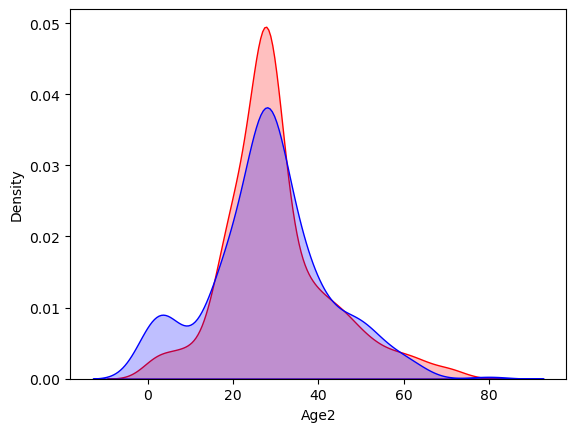

In [200]:
sns.kdeplot(train.loc[(train['Survived'])==0,'Age2'], color='r', shade=True, label = 'Not Survived')
sns.kdeplot(train.loc[(train['Survived'])==1,'Age2'], color='b', shade=True, label = 'Survived')

C:\Users\User\AppData\Local\Temp\ipykernel_18044\2955866227.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['Survived'])==0,'Sex'], color='r', shade=True, label = 'Not Survived')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_18044\2955866227.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['Survived'])==1,'Sex'], color='b', shade=True, label = 'Survived')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_

<Axes: xlabel='Sex', ylabel='Density'>

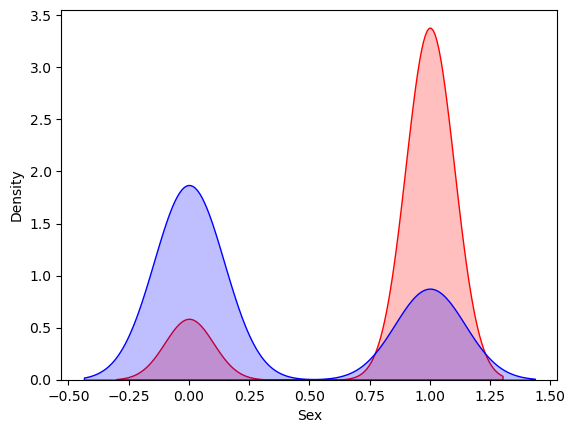

In [201]:
sns.kdeplot(train.loc[(train['Survived'])==0,'Sex'], color='r', shade=True, label = 'Not Survived')
sns.kdeplot(train.loc[(train['Survived'])==1,'Sex'], color='b', shade=True, label = 'Survived')

In [202]:
train['family_size'] = train['SibSp']+ train['Parch'] + 1 
print(train.head())
print(train['family_size'].value_counts())

             Survived  Pclass  Sex  SibSp  Parch     Fare  Age2  family_size
PassengerId                                                                 
1                   0       3    1      1      0   7.2500    22            2
2                   1       1    0      1      0  71.2833    38            2
3                   1       3    0      0      0   7.9250    26            1
4                   1       1    0      1      0  53.1000    35            2
5                   0       3    1      0      0   8.0500    35            1
family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


In [203]:
# categorize family size using lambda function
train['family_group'] = train['family_size'].apply(lambda x: 'alone' if x == 1 else ('small' if 2 <= x <= 4 else 'large'))

# Display the first few rows to verify the result
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2,family_size,family_group
PassengerId,,,,,,,,,
1,0,3,1,1,0,7.2500,22,2,small
2,1,1,0,1,0,71.2833,38,2,small
3,1,3,0,0,0,7.9250,26,1,alone
4,1,1,0,1,0,53.1000,35,2,small
5,0,3,1,0,0,8.0500,35,1,alone


In [204]:
# other method for grouping famlies by sizes :

def family_group(size):
    a=''
    if (size <= 1):
        a = 'alone'
    elif (size <= 4):
        a='small'
    else:
        a='large'
    return a
train['family_group']= train['family_size'].map(family_group)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2,family_size,family_group
PassengerId,,,,,,,,,
1,0,3,1,1,0,7.2500,22,2,small
2,1,1,0,1,0,71.2833,38,2,small
3,1,3,0,0,0,7.9250,26,1,alone
4,1,1,0,1,0,53.1000,35,2,small
5,0,3,1,0,0,8.0500,35,1,alone


In [205]:
# categorize Age using lambda function
train['age_group'] = train['Age2'].apply(lambda x:'infant' if x == 1 else( 'todler' if x <= 4 else('child' if x <= 14 else ('teenager' if x<=25 else ('adult' if x <= 45 else ('middle_age' if x<= 55 else 'old') )))))
train['age_group'].value_counts()

age_group
adult         489
teenager      223
middle_age     62
old            39
child          38
todler         33
infant          7
Name: count, dtype: int64

In [206]:
train['fare_per_person'] = train['Fare'] / train['family_size']
train['fare_group'] = train['Fare'] * train['family_size']
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2,family_size,family_group,age_group,fare_per_person,fare_group
PassengerId,,,,,,,,,,,,
1,0,3,1,1,0,7.2500,22,2,small,teenager,3.62500,14.5000
2,1,1,0,1,0,71.2833,38,2,small,adult,35.64165,142.5666
3,1,3,0,0,0,7.9250,26,1,alone,adult,7.92500,7.9250
4,1,1,0,1,0,53.1000,35,2,small,adult,26.55000,106.2000
5,0,3,1,0,0,8.0500,35,1,alone,adult,8.05000,8.0500


In [207]:
train['Embarked'] = test['Embarked']
train =pd.get_dummies(train, columns=['Embarked','family_group','age_group'], drop_first=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2,family_size,fare_per_person,fare_group,family_group_large,family_group_small,age_group_child,age_group_infant,age_group_middle_age,age_group_old,age_group_teenager,age_group_todler
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,1,1,0,7.2500,22,2,3.62500,14.5000,False,True,False,False,False,False,True,False
2,1,1,0,1,0,71.2833,38,2,35.64165,142.5666,False,True,False,False,False,False,False,False
3,1,3,0,0,0,7.9250,26,1,7.92500,7.9250,False,False,False,False,False,False,False,False
4,1,1,0,1,0,53.1000,35,2,26.55000,106.2000,False,True,False,False,False,False,False,False
5,0,3,1,0,0,8.0500,35,1,8.05000,8.0500,False,False,False,False,False,False,False,False


In [208]:
train.drop([ 'Fare', 'Age2','fare_per_person','family_size'],axis=1, inplace = True)

In [209]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,fare_group,family_group_large,family_group_small,age_group_child,age_group_infant,age_group_middle_age,age_group_old,age_group_teenager,age_group_todler
PassengerId,,,,,,,,,,,,,,
1,0,3,1,1,0,14.5000,False,True,False,False,False,False,True,False
2,1,1,0,1,0,142.5666,False,True,False,False,False,False,False,False
3,1,3,0,0,0,7.9250,False,False,False,False,False,False,False,False
4,1,1,0,1,0,106.2000,False,True,False,False,False,False,False,False
5,0,3,1,0,0,8.0500,False,False,False,False,False,False,False,False


In [210]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [213]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Text(0.5, 1.0, 'Classifier Accuracy')

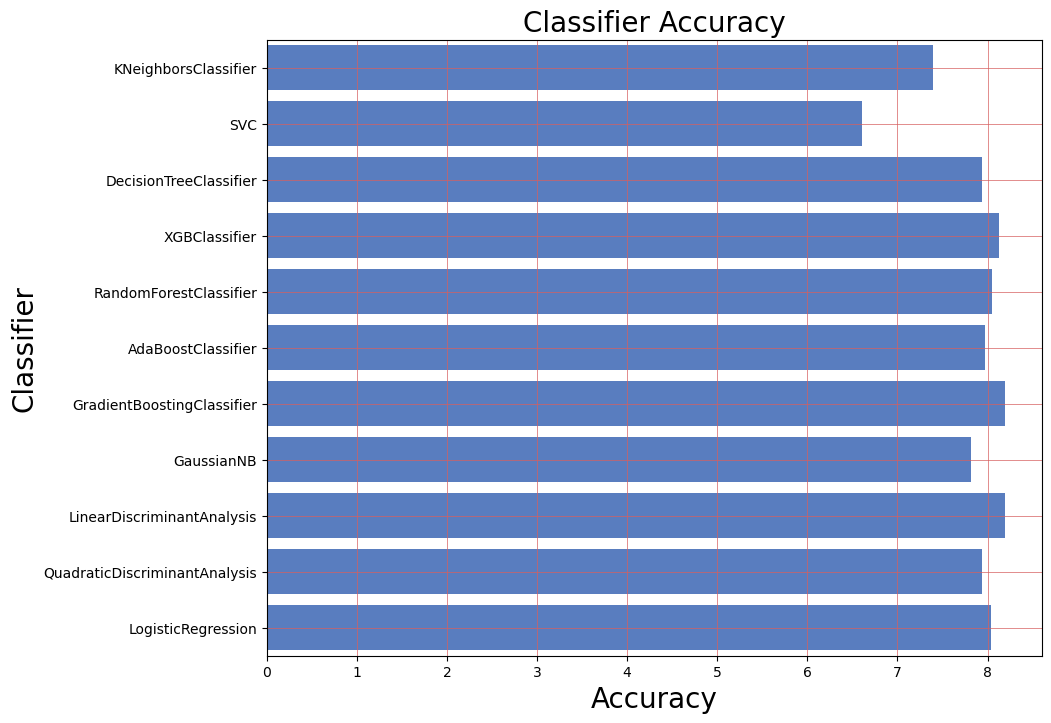

In [214]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9,10]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)